In [7]:
import os.path
import pandas as pd
import seaborn as sns

In [8]:

csv_files = [fn for fn in os.listdir("ts.csv") if fn.endswith("csv")]
ts = pd.read_csv(f"ts.csv/{csv_files[0]}")

<Axes: xlabel='datetime', ylabel='value'>

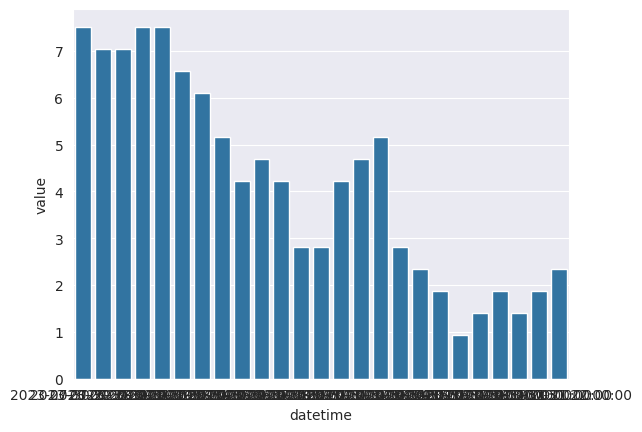

In [9]:

sns.barplot(data=ts, x="datetime", y="value")